___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>

<center><em>Copyright: Pierian Data Inc.</em></center>

_____

# Research

QuantConnect allows us to explore equity data in a notebook format, allowing us to explore data with Pandas and Visualization Libraries.

In [1]:
qb = QuantBook()

fb = qb.AddEquity("FB")
aapl = qb.AddEquity("AAPL")
amzn = qb.AddEquity("AMZN")
nflx = qb.AddEquity("NFLX")
goog = qb.AddEquity("GOOG")


Get historical stock prices for all added securities for the last 365 days by calling **qb.History(ticker(s), days, resolution)**

In [2]:
history = qb.History(qb.Securities.Keys, 365, Resolution.Daily)

You can use history.loc[symbol] to access the data of a particular stock

In [3]:
history.loc[fb.Symbol]  # history.loc["FB"] is identical

,close,high,low,open,volume
time,,,,,
2020-02-13,210.76,211.22,207.40,208.00,12900521.0
2020-02-14,213.14,214.32,209.18,209.69,14443962.0
2020-02-15,214.18,214.93,212.67,214.04,9959779.0
2020-02-19,217.80,217.98,213.39,213.55,15811191.0
2020-02-20,217.49,218.38,216.12,217.99,11529437.0
...,...,...,...,...,...
2021-07-20,336.95,339.83,334.54,337.90,13333026.0
2021-07-21,341.66,343.45,334.50,338.80,10451966.0
2021-07-22,346.23,346.53,341.25,341.50,8614561.0


If you want you can directly plot those values via **history.loc[symbol][column].plot()**

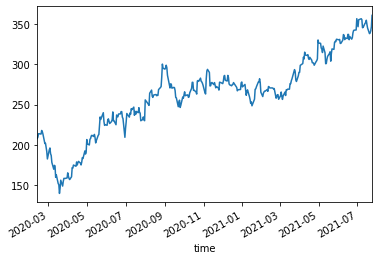

In [4]:
history.loc[fb.Symbol]["open"].plot()

Or you can use matplotlib

(array([737485., 737546., 737607., 737669., 737730., 737791., 737850.,
        737911., 737972.]),
 <a list of 9 Text major ticklabel objects>)

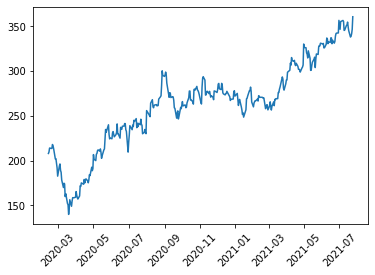

In [5]:
plt.figure
plt.plot(history.loc[fb.Symbol]["open"])
plt.xticks(rotation=45)  # Rotate x labels to increase readability


You can also loop over the Keys in the securities and plot all prices

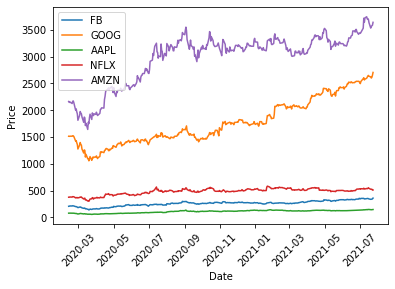

In [6]:
plt.figure()
for key in qb.Securities.Keys:
    data = history.loc[key]
    plt.plot(data["open"], label=key.Value)

plt.xticks(rotation=45)
plt.ylabel("Price")
plt.xlabel("Date")
plt.legend()

## Accessing fundamentals

We can simply access the fundamentals by calling **qb.GetFundamental(ticker(s), fundamental, days)** <br />
A pandas dataframe is returned

In [7]:
# Access the yearly ebit
ebit_history = qb.GetFundamental(qb.Securities.Keys,
                 "FinancialStatements.IncomeStatement.EBIT.TwelveMonths",
                 datetime(2017, 1, 1), datetime.now())

In [8]:
ebit_history

,AAPL R735QTJ8XC9X,AMZN R735QTJ8XC9X,FB V6OIPNZEM8V9,GOOCV VP83T1ZUHROL,NFLX SEWJWLJNHZDX
2017-01-03,6.282800e+10,2.027000e+09,6.217000e+09,1.975500e+10,3.058260e+08
2017-01-04,6.282800e+10,2.027000e+09,6.217000e+09,1.975500e+10,3.058260e+08
2017-01-05,6.282800e+10,2.027000e+09,6.217000e+09,1.975500e+10,3.058260e+08
2017-01-06,6.282800e+10,2.027000e+09,6.217000e+09,1.975500e+10,3.058260e+08
2017-01-09,6.282800e+10,2.027000e+09,6.217000e+09,1.975500e+10,3.058260e+08
...,...,...,...,...,...
2021-07-21,6.996400e+10,2.582500e+10,3.267100e+10,4.821700e+10,4.585289e+09
2021-07-22,6.996400e+10,2.582500e+10,3.267100e+10,4.821700e+10,4.585289e+09
2021-07-23,6.996400e+10,2.582500e+10,3.267100e+10,4.821700e+10,4.585289e+09
2021-07-26,6.996400e+10,2.582500e+10,3.267100e+10,4.821700e+10,4.585289e+09


## Using Indicators
You can use indicators in quantconnect research notebooks by simply using **qb.Indicator(indicator, symbol, timespan, resolution)**
A pandas dataframe is returned containing the values.

In [13]:
bollinger = qb.Indicator(BollingerBands(30, 2), fb.Symbol, 365, Resolution.Daily)

In [14]:
bollinger.head()

,bandwidth,bollingerbands,lowerband,middleband,percentb,price,standarddeviation,upperband
2020-03-26,52.915995,156.21,134.057510,182.287000,0.229657,156.21,24.114745,230.516490
2020-03-27,52.566939,163.34,133.210439,180.706333,0.317181,163.34,23.747947,228.202227
2020-03-28,52.191391,156.79,132.161590,178.828000,0.263877,156.79,23.333205,225.494410
2020-03-31,50.757809,165.95,132.243754,177.220333,0.374709,165.95,22.488290,222.196913
2020-04-01,48.427427,166.80,133.020343,175.520333,0.397408,166.80,21.249995,218.020324


As std, percentb and bandwith skew our plot we drop them

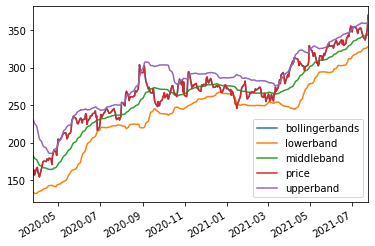

In [18]:
bollinger.drop(["standarddeviation","percentb", "bandwidth"], 1).plot()